In [67]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

#print(ride_data.head())
#print(city_data.head())
# Combine the data into a single dataset
combine_data=pd.merge(ride_data,city_data, on='city', how='left')
combine_data.head()
combine_data.type.unique()
# Display the data table for preview
city_data['city'].describe()
ride_data['city'].describe()
combine_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

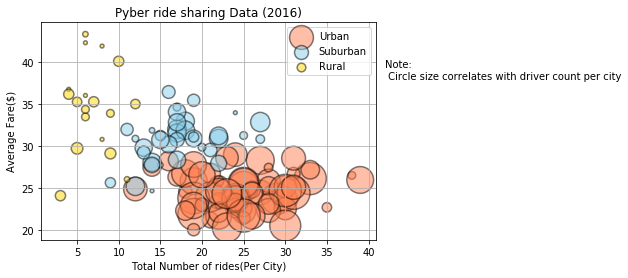

In [87]:
# Obtain the x and y coordinates for each of the three city types
combine_data_grp=combine_data.groupby(['city'])
combine_data_grp.head()
fare_mean=combine_data_grp['fare'].mean()
ride_count=combine_data_grp['ride_id'].count()
driver_count=combine_data_grp['driver_count'].mean()
city_types=combine_data_grp['type'].unique()


car_df=pd.DataFrame({'fare_mean':fare_mean,'ride_count':ride_count,'driver_count':driver_count, 'city_types':city_types})
car_df.head()


urban=car_df.loc[car_df['city_types']=='Urban']
urban.head()

Suburban=car_df.loc[car_df['city_types']=='Suburban']
Suburban.head()



Rural=car_df.loc[car_df['city_types']=='Rural']
Rural.head()

plt.scatter(urban["ride_count"], urban["fare_mean"], color = "coral", edgecolors="black", s = urban["driver_count"]*15, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(Suburban["ride_count"], Suburban["fare_mean"], color = "skyblue", edgecolors="black", s = Suburban["driver_count"]*15, label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(Rural["ride_count"], Rural["fare_mean"], color = "gold", edgecolors="black", s = Rural["driver_count"]*15, label = "Rural", alpha = 0.5, linewidth = 1.5)


#plt.scatter(countride,averageride, marker=“o”, facecolors=“red”, edgecolors=“black”, s=drivercount, alpha=0.75)

plt.xlabel("Total Number of rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber ride sharing Data (2016)")

plt.text(42,38, "Note:\n Circle size correlates with driver count per city")
plt.legend(loc='upper right')

# Save Figure
plt.grid()
plt.show()
plt.savefig("../Images/ScatterRideSharingData.png")

In [69]:
# Show plot
plt.show()

## Total Fares by City Type

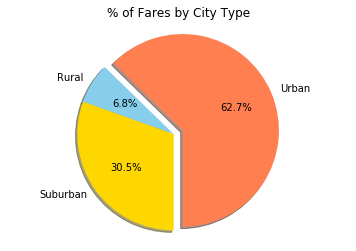

In [88]:
# Calculate Type Percents
urban_df=combine_data.loc[combine_data['type']=='Urban']
urban.head()

Suburban_df=combine_data.loc[combine_data['type']=='Suburban']
Suburban.head()



Rural_df=combine_data.loc[combine_data['type']=='Rural']
Rural.head()

total_fare=combine_data['fare'].sum()
#grp_type=combine_data.groupby('type')
#a=(grp_type['fare'].sum()/total_fare).reset_index()
urban_fare=urban_df['fare'].sum()/total_fare
Suburban_fare=Suburban_df['fare'].sum()/total_fare
Rural_fare=Rural_df['fare'].sum()/total_fare

fare=[urban_fare,Rural_fare,Suburban_fare]
city_type = ["Urban", "Rural", "Suburban"]
#city_type_fare = a['fare'].sort_values(ascending=False)
colors = ["coral","skyblue","gold"]
explode = (0.1,0,0)
plt.title('% of Fares by City Type')
plt.pie(fare, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPiesFares.png")
plt.show()




# Build Pie Chart

# Save Figure


In [71]:
# Show Figure
plt.show()

## Total Rides by City Type

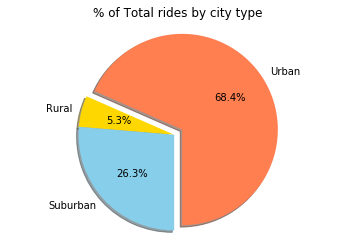

In [85]:
# Calculate Ride Percents
urban_df=combine_data.loc[combine_data['type']=='Urban']
urban.head()

Suburban_df=combine_data.loc[combine_data['type']=='Suburban']
Suburban.head()



Rural_df=combine_data.loc[combine_data['type']=='Rural']
Rural.head()


ride_count=combine_data['ride_id'].count()
urban_ride_percent=urban_df['ride_id'].count()/ride_count
Suburban_ride_percent=Suburban_df['ride_id'].count()/ride_count
Rural_ride_percent=Rural_df['ride_id'].count()/ride_count
ride=[urban_ride_percent,Rural_ride_percent,Suburban_ride_percent]

# Build Pie Chart

city_type = ["Urban","Rural", "Suburban"]
colors = ["coral","gold","skyblue"]
explode = (0.1,0,0)
plt.title('% of Total rides by city type')
plt.pie(ride, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPiesRides.png")
plt.show()
# Save Figure


In [73]:
# Show Figure
plt.show()

## Total Drivers by City Type

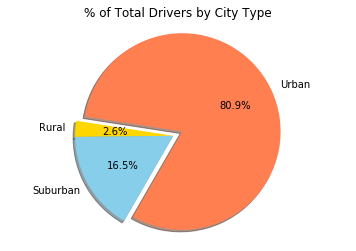

In [86]:
# Calculate Driver Percents
driver_count=city_data['driver_count'].sum()

urban_dc=city_data.loc[city_data['type']=='Urban']

Suburban_dc=city_data.loc[city_data['type']=='Suburban']

Rural_dc=city_data.loc[city_data['type']=='Rural']


urban_driver_percent=urban_dc['driver_count'].sum()/driver_count
Suburban_driver_percent=Suburban_dc['driver_count'].sum()/driver_count
Rural_driver_percent=Rural_dc['driver_count'].sum()/driver_count
driver=[urban_driver_percent,Rural_driver_percent,Suburban_driver_percent]

# Build Pie Chart

city_type = ["Urban","Rural", "Suburban"]
colors = ["coral","gold","skyblue"]
explode = (0.1,0,0)
plt.title('% of Total Drivers by City Type')
plt.pie(driver, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPiesDrivers.png")
plt.show()

# Build Pie Charts

# Save Figure


In [75]:
# Show Figure
plt.show()